<a href="https://colab.research.google.com/github/udayanjansai/Hierarchical_Clustering_Notebook/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
X=df.iloc[:,3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

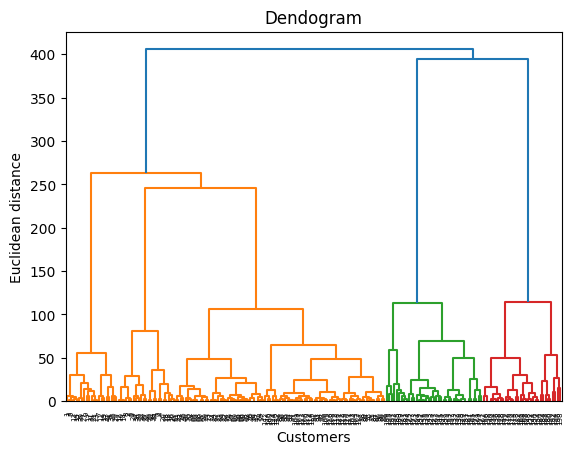

In [13]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram' )
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

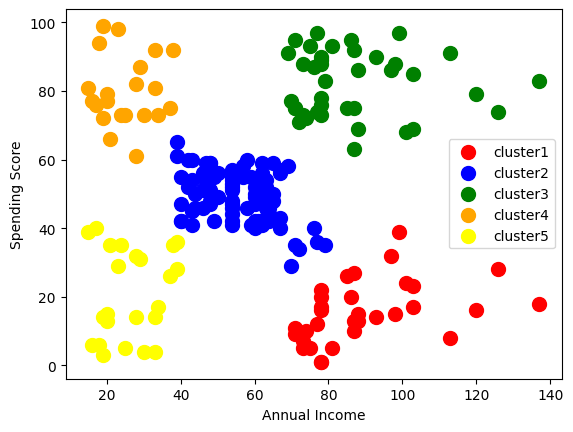

In [17]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='orange',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='yellow',label='cluster5')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [18]:
centroids = []
for i in range(5):
    centroids.append(X[y_hc == i].mean(axis=0))

centroids = np.array(centroids)
print(centroids)

[[89.40625    15.59375   ]
 [55.81176471 49.12941176]
 [86.53846154 82.12820513]
 [25.0952381  80.04761905]
 [26.30434783 20.91304348]]


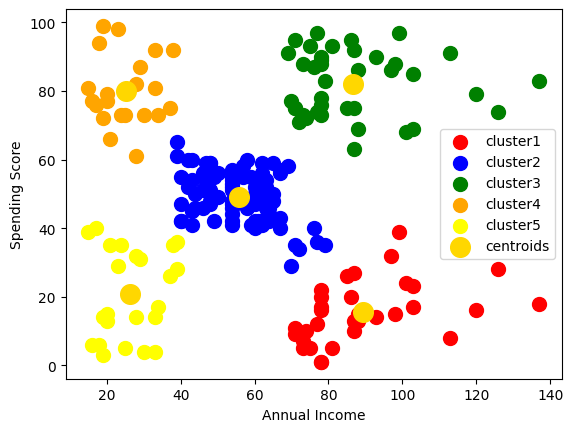

In [20]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='orange',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='yellow',label='cluster5')

plt.scatter(centroids[:,0],centroids[:,1],s=200,c='gold',label='centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,y_hc)
print(score)

0.5529945955148897


In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

print("Path to dataset files:", path)

100%|██████████| 903k/903k [00:00<00:00, 993kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankurzing/sentiment-analysis-for-financial-news/versions/5


In [23]:
import os
os.listdir(path)

['FinancialPhraseBank', 'all-data.csv']

In [31]:
df=pd.read_csv(os.path.join(path, 'all-data.csv'), encoding='latin-1',header=None)
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [32]:
# Install dependencies (if needed)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df[1].apply(preprocess)


In [35]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()


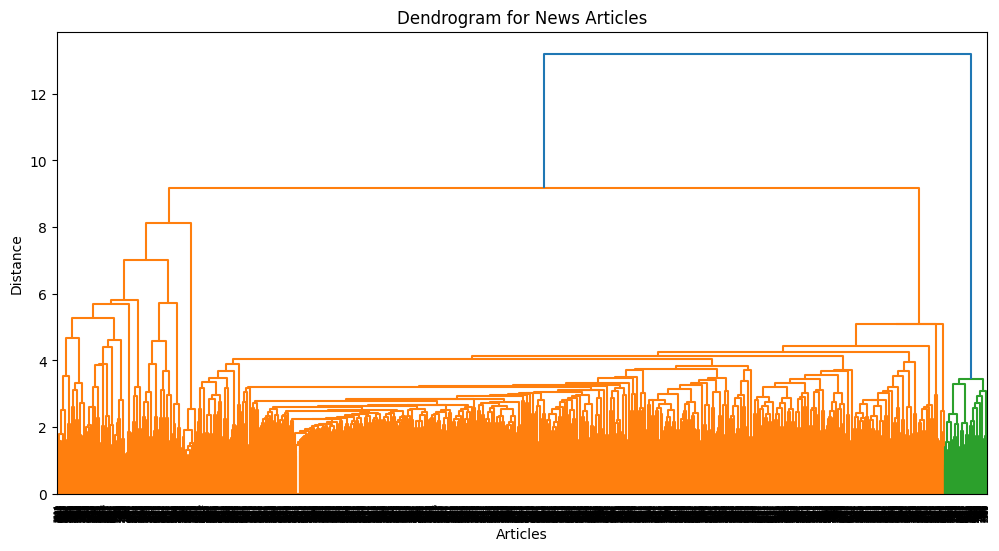

In [36]:
plt.figure(figsize=(12, 6))

linked = linkage(X, method='ward')

dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)

plt.title("Dendrogram for News Articles")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()


In [48]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['cluster'] = hc.fit_predict(X)

df[[1, 'cluster']].head(10)


,1,cluster
0,"According to Gran , the company has no plans t...",2
1,Technopolis plans to develop in stages an area...,2
2,The international electronic industry company ...,2
3,With the new production plant the company woul...,2
4,According to the company 's updated strategy f...,0
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,2
6,"For the last quarter of 2010 , Componenta 's n...",4
7,"In the third quarter of 2010 , net sales incre...",4
8,Operating profit rose to EUR 13.1 mn from EUR ...,4
9,"Operating profit totalled EUR 21.1 mn , up fro...",4


In [49]:
score=silhouette_score(X,df['cluster'])
print(score)

0.008024824271607224


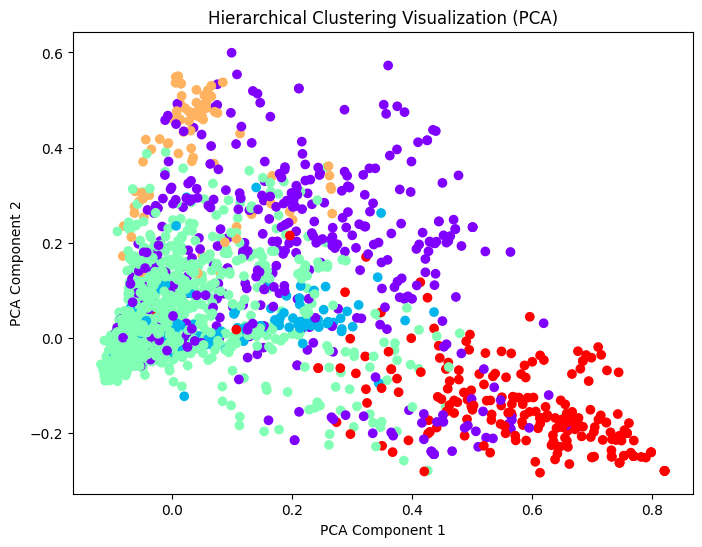

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce TF-IDF features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='rainbow')

plt.title("Hierarchical Clustering Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


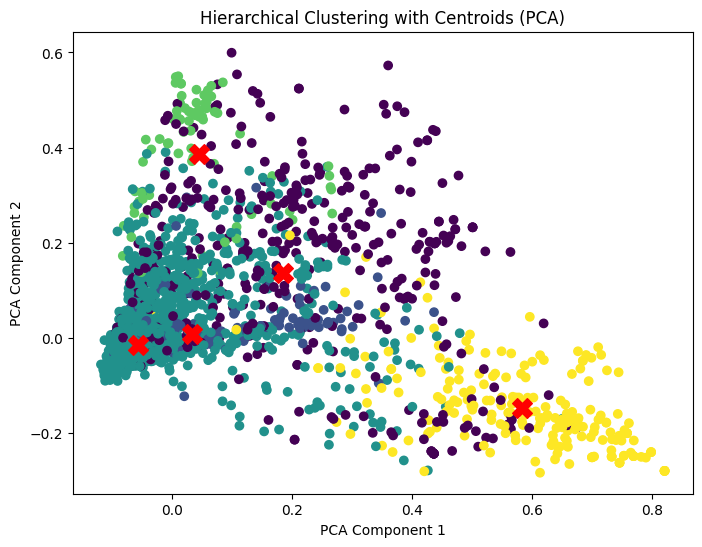

In [43]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

clusters = df['cluster'].values

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

# ---- Compute centroids manually ----
centroids = []
for i in np.unique(clusters):
    centroid = X_pca[clusters == i].mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200,c='red')

plt.title("Hierarchical Clustering with Centroids (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [52]:
feature_names = vectorizer.get_feature_names_out()
n_clusters = hc.n_clusters
labels = df['cluster']

for cluster in range(n_clusters):
  print(f"\nCluster {cluster}")

  cluster_indices = np.where(labels == cluster)
  cluster_tfidf = X[cluster_indices]

  mean_tfidf = np.mean(cluster_tfidf, axis=0)
  top_indices = mean_tfidf.argsort() [-10:][ ::- 1]

  top_words = [feature_names[i] for i in top_indices]
  print("Top Words:", top_words)


Cluster 0
Top Words: ['eur', 'million', 'net', 'profit', 'sale', 'period', 'value', 'operating', 'percent', 'quarter']

Cluster 1
Top Words: ['share', 'per', 'eur', 'eps', 'capital', 'board', 'earnings', 'option', 'dividend', 'right']

Cluster 2
Top Words: ['company', 'said', 'finland', 'finnish', 'service', 'sale', 'market', 'business', 'year', 'new']

Cluster 3
Top Words: ['mln', 'euro', 'net', 'profit', 'eur', 'sale', 'oyj', 'finnish', 'first', 'quarter']

Cluster 4
Top Words: ['mn', 'eur', 'profit', 'operating', 'period', 'corresponding', 'loss', 'compared', 'net', 'quarter']
